In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')



목차

1. 데이터셋 확인
  1) Null data check(결측치 확인)
  2) Outlier data chech(이상치 확인)
  3) Target label 확인
2. EDA(Exploratory Data Analysis)
  1) Pregnancies
  2) Glucose
  3) Preg
3. Feature engineering
  1) Fill Null data
  2) 
4. Building machine learning model and prediction using the trained model
  1) praeparation = Split dataset into train, valid and test set
  2) model generation and prediction
  3) featue importance
5. Conclusion

In [2]:
df_all = pd.read_csv('./pima_indians/diabetes.csv')

In [3]:
df_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


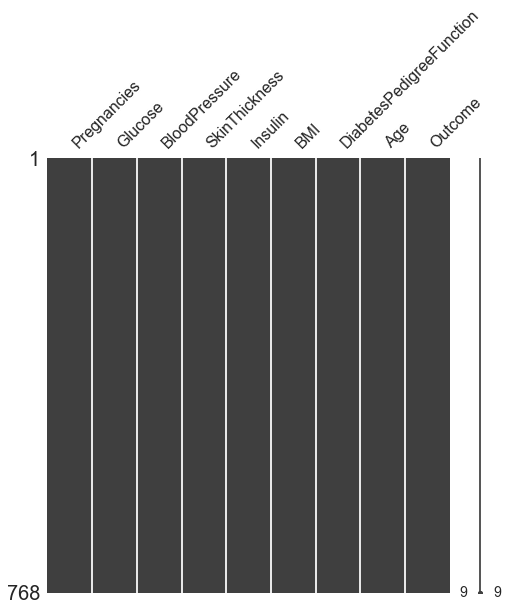

In [5]:
msno.matrix(df_all, figsize=(8,8))

In [6]:
df_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
y = df_all['Outcome']
X = df_all.drop('Outcome', axis=1)

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [10]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

2. 이상치 확인하기

describe를 사용하여 기술통계치를 확인해보자.


In [11]:
df_all.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min의 값이 0인 피쳐들이 많은 것을 확인할 수 있을 것이다.
어떠한 이유에서 이런것이 생겼는지는 모르지만 혈압이 0이고 인슐린이 0인 경우는 사람이 죽은 경우일 것이다.
그러므로 데이터가 누락된 것으로 볼 수 있는데 이 부분을 좀 더 뜯어보자.

In [12]:
for column in df_all.columns:
    zero_count = df_all[df_all[column] == 0][column].count()
    zero_percent = df_all[df_all[column] == 0][column].count() / df_all.shape[0]
    print('{:>25}\t 0의 개수: {}\t\t {:.2f}'.format(column, zero_count, zero_percent))
    

              Pregnancies	 0의 개수: 111		 0.14
                  Glucose	 0의 개수: 5		 0.01
            BloodPressure	 0의 개수: 35		 0.05
            SkinThickness	 0의 개수: 227		 0.30
                  Insulin	 0의 개수: 374		 0.49
                      BMI	 0의 개수: 11		 0.01
 DiabetesPedigreeFunction	 0의 개수: 0		 0.00
                      Age	 0의 개수: 0		 0.00
                  Outcome	 0의 개수: 500		 0.65


SkinThickness와 insulin 같은 경우는 30%, 50%가 0이기 때문에 삭제를 하는 대신 평균값으로 채워 넣도록 하겠다.

In [13]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for zero_feature in zero_features:
    df_all[zero_feature] = df_all[zero_feature].replace(0, df_all[zero_feature].mean())

In [14]:
for column in df_all.columns:
    zero_count = df_all[df_all[column] == 0][column].count()
    zero_percent = df_all[df_all[column] == 0][column].count() / df_all.shape[0]
    print('{:>25}\t 0의 개수: {}\t\t {:.2f}'.format(column, zero_count, zero_percent))

              Pregnancies	 0의 개수: 111		 0.14
                  Glucose	 0의 개수: 0		 0.00
            BloodPressure	 0의 개수: 0		 0.00
            SkinThickness	 0의 개수: 0		 0.00
                  Insulin	 0의 개수: 0		 0.00
                      BMI	 0의 개수: 0		 0.00
 DiabetesPedigreeFunction	 0의 개수: 0		 0.00
                      Age	 0의 개수: 0		 0.00
                  Outcome	 0의 개수: 500		 0.65


In [ ]:
이제 Train 데이터와 Target 데이터를 나누자

In [ ]:
X = df_all.iloc[:,:-1]
y = df_all.iloc[:,-1]

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
로지스틱 회귀모델을 사용할 것이기 때문에 표준화를 시켜주자. 회귀모형은 데이터가 정규분포를 한다는 가정하에
만들어졌기 때문에 표준화를 시켜주면 좀 더 정확하고 민감하지 않게 예측할 수 있다.

In [19]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

로지스틱회귀모델을 이용해 예측하고 오차행렬 등 측정치들을 이용해 측정해보자

In [21]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [22]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf_pred = lr_clf.predict(X_test)

In [23]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차행렬:\n',confusion)
    print('정확도: \t{:>10.4f}\n정밀도: \t{:>10.4f}\n재현율(민감도): {:>10.4f}\nF1스코어: \t{:>10.4f}\nROC_AUC 스코어: {:>10.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    

In [24]:
get_clf_eval(y_test, lr_clf_pred)

오차행렬:
 [[98  9]
 [19 28]]
정확도: 	    0.8182
정밀도: 	    0.7568
재현율(민감도):     0.5957
F1스코어: 	    0.6667
ROC_AUC 스코어:     0.7558


In [ ]:
정밀도와 재현율의 경우는 서로 반비례 관계에 있다.(트레이드 오프관계)
그렇기 때문에 둘 다 높아질 수 없으므로 둘 다 적절히 높은 점수를 가질 수 있는 곳의 임계값을 구해보자.
먼저 시각화를 통해서 중간지점의 임계값이 어딘지를 대충 찾아보자.

In [25]:
from sklearn.metrics import precision_recall_curve

In [26]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

In [27]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.legend()
    
    plt.xlabel('threshold values'); plt.ylabel('precision and recall values')
    
    

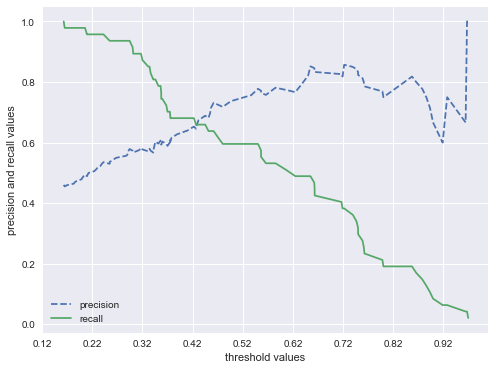

In [28]:
precision_recall_curve_plot(y_test, pred_proba_class1)

임계값 0.42 부분이 정밀도와 재현율(민감도)가 비슷한 지점이다.
피나 인디언 당뇨병 예측같은 경우는 정밀도보다는 재현율이 더 중요한 분석과제라고 할 수 있다.
당뇨병이 맞는데 아니라고 예측할 경우 문제가 커질 수 있기 때문이다.
물론 암보다는 재현율의 중요도는 떨어지지만 당뇨병도 재현율이 중요하다.
그 부근의 측정치들을 확인해보자.

In [29]:
from sklearn.preprocessing import Binarizer

In [30]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba = pred_proba[:,1].reshape(-1,1)

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]

In [31]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold)
        binarizer.fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        
        print('---------------------------------')
        print('임곗값:', custom_threshold)
        
        get_clf_eval(y_test, custom_predict)

In [36]:
get_eval_by_threshold(y_test, pred_proba, thresholds)

---------------------------------
임곗값: 0.3
오차행렬:
 [[75 32]
 [ 4 43]]
정확도: 	    0.7662
정밀도: 	    0.5733
재현율(민감도):     0.9149
F1스코어: 	    0.7049
ROC_AUC 스코어:     0.8079
---------------------------------
임곗값: 0.33
오차행렬:
 [[77 30]
 [ 7 40]]
정확도: 	    0.7597
정밀도: 	    0.5714
재현율(민감도):     0.8511
F1스코어: 	    0.6838
ROC_AUC 스코어:     0.7853
---------------------------------
임곗값: 0.36
오차행렬:
 [[84 23]
 [13 34]]
정확도: 	    0.7662
정밀도: 	    0.5965
재현율(민감도):     0.7234
F1스코어: 	    0.6538
ROC_AUC 스코어:     0.7542
---------------------------------
임곗값: 0.39
오차행렬:
 [[89 18]
 [15 32]]
정확도: 	    0.7857
정밀도: 	    0.6400
재현율(민감도):     0.6809
F1스코어: 	    0.6598
ROC_AUC 스코어:     0.7563
---------------------------------
임곗값: 0.42
오차행렬:
 [[90 17]
 [15 32]]
정확도: 	    0.7922
정밀도: 	    0.6531
재현율(민감도):     0.6809
F1스코어: 	    0.6667
ROC_AUC 스코어:     0.7610
---------------------------------
임곗값: 0.45
오차행렬:
 [[93 14]
 [17 30]]
정확도: 	    0.7987
정밀도: 	    0.6818
재현율(민감도):     0.6383
F1스코어: 	    0.6593
ROC_AUC 스코어:     

측정치들을 확인한 결과 정밀도가 좀 낮지만 재현율이 큰 0.3을 택해서 사용하도록 하겠다.

In [39]:
binarizer = Binarizer(threshold = 0.3)
pred_th_3 = binarizer.fit(pred_proba)
pred_th_3 = binarizer.transform(pred_proba)

In [40]:
get_clf_eval(y_test, pred_th_3)

오차행렬:
 [[75 32]
 [ 4 43]]
정확도: 	    0.7662
정밀도: 	    0.5733
재현율(민감도):     0.9149
F1스코어: 	    0.7049
ROC_AUC 스코어:     0.8079
